In [2]:
import json
import matplotlib.pyplot as plt
import numpy as np

In [7]:
def sortedByVal(pair):
    return int(pair[0]);

def getTwoArrayByAlg(alg):
    xArg = []
    yArg = []
    lineArg = []
    for x in alg:
        lineArg.append((x, alg[x]))
    lineArg.sort(key=sortedByVal)
    for x in lineArg:
        xArg.append(x[0])
        yArg.append(x[1])
    return (xArg, yArg)

def showResult(wordLen):
    d = open(str(wordLen), "r")
    testCase = json.loads(d.read())
    for alg in testCase["algRes"]:
        axies = getTwoArrayByAlg(testCase["algRes"][alg])
        plt.plot(axies[0], axies[1], 'bo-', label=alg)
        
        
        plt.xlabel('частоты встречаемости слов данной длины');
        #каждое деление соответствует отдельному слову
        plt.ylabel('время работы (мс)');
        
        plt.legend();
        plt.show();
        plt.clf()
    plt.close()

# Посмотрим, как же работают наши алгоритмы в условиях, когда данные увеличиваются

пусть количество данных растет каждый раз на константу

In [3]:
def compareByTextSize(pair):
    return int(pair[0])

def increaseDate(fileName):
    f = open(str(fileName), 'r');
    testCase = json.loads(f.read())
    data = [];
    algorithms = {};
    
    for item in testCase:
        data.append(json.loads(item));
        
    for i in range(len(data)):   
        for alg in data[i]['algRes']:
            x = data[i]['name'].split()[2];
            y = data[i]['algRes'][alg];
            algorithms.setdefault(alg, []);
            algorithms[alg].append((x,y))
    for alg in algorithms:
        algorithms[alg].sort(key=compareByTextSize)
    return algorithms;

def sliceInto2Array(lineArg):
    xArg = []
    yArg = []
    for x in lineArg:
        xArg.append(x[0])
        yArg.append(x[1])
    return (xArg, yArg);

def showIncreasedData(fileName):
    rawAns = increaseDate(fileName);
    for alg in rawAns:
        axies = sliceInto2Array(rawAns[alg])
        plt.plot(axies[0], axies[1], 'bo-', label=alg) 
        
        plt.xlabel('количестов символов в тексте')
        plt.ylabel('скорость работы (мс)')
        
        plt.legend();
        plt.show();
        plt.clf()
    plt.close()
        

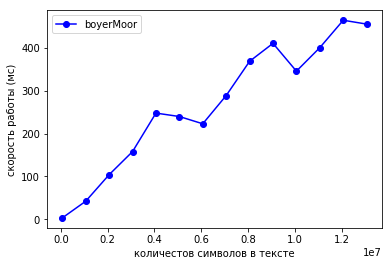

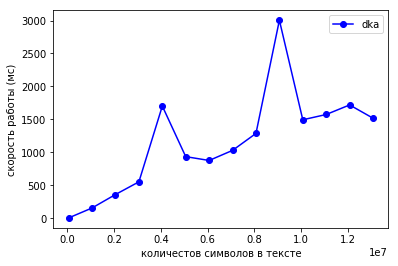

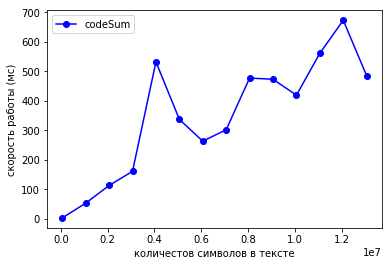

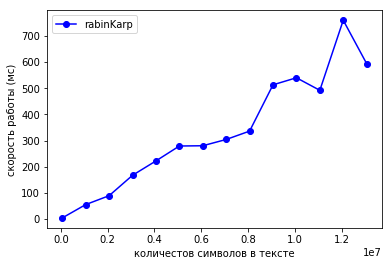

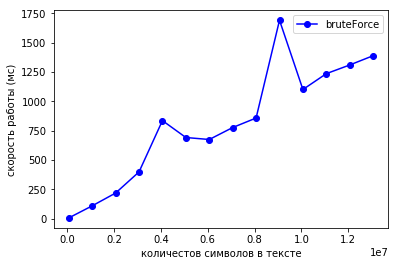

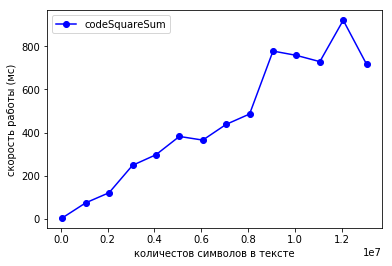

In [4]:
showIncreasedData("decreaseData.txt")

Как мы видим, при некоторых размерах, алгоритмы работают медленнее тех случаев, даже когда данных было больше. Я тестировал на одном и том же тексте, вычитаю с конца определенную часть, так что объяснить такие результаты я могу разве что космическими лучами, либо же особенностями работы ОС. В любом случае мы можем видеть, как растет скорость работы и рост в таком случае линеен. К слову, у алгоритма Бойера-Мура скорость более плавная и сравнительно маленькая, относительно других алгоритмов.

# Бойер-Мур +1

теперь же пусть эти данные увеличиваются в два раза

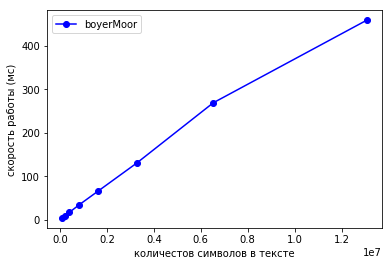

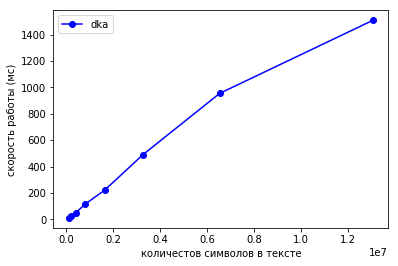

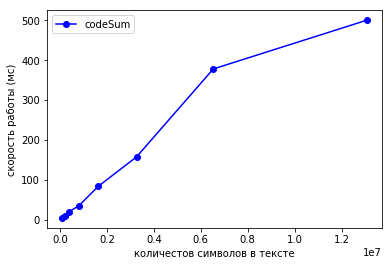

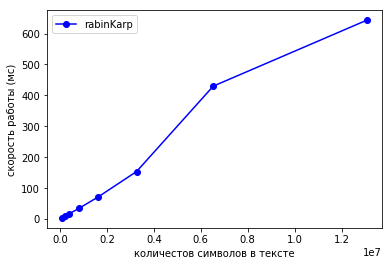

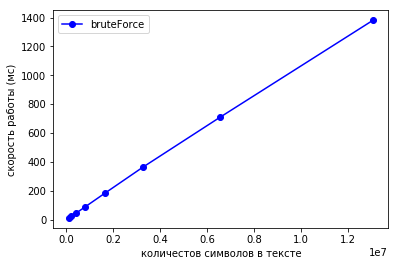

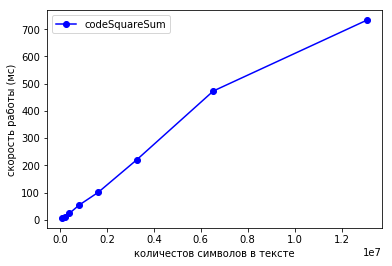

In [5]:
showIncreasedData("decreasedByTermTwoData.txt");

Как можно видеть, у каждого из алгоритмов количество вычислений растет примерно пропорционально количеству
данных в тексте из чего можно заключить, что сложность каждого из алгоритмов линейно зависит от количества 
данных. Ну и конечно, в таком случае, алгоритм Бойера-Мура выигрывает у всех остальных.

# Бойер-Мур +1

# Пару искусственных примеров

In [ ]:
def barContent(fileName):
    file = open(fileName)
    content = json.load(file)
    return content

def barData(fileName):
    rawAlg = barContent(fileName)
    data = []
    subscribtions = []
    for alg in rawAlg['algRes']:
        data.append(rawAlg['algRes'][alg])
        subscribtions.append(alg)


    barColors = ['b', 'g', 'r', 'c', 'm', 'y']
    return { "data" : data,
             "subscribtions" : subscribtions,
             "barColors" : barColors
           }
def showBar(data,  theme):
    amountAlg = len(data['data'])
    plt.title(theme)
    plt.bar(np.arange(amountAlg), data['data'], align='center', color=['Orange'])
    plt.xticks(np.arange(amountAlg), data['subscribtions'])
    plt.show()
    

проверим, как отработают наши алгоритмы на таких текстах и строках для поиска:
    1. поиск большой подстроки состоящей из букв "a" в тексте, состоящем из букв "a"
    2. ситуация, аналогичная предыдущей, но только в конце ищущейся подстроки стоит буква "b"
    
Отметим, что на гистограммах указывается информация работы алгоритма, относительно общего времени работы разных реализаций

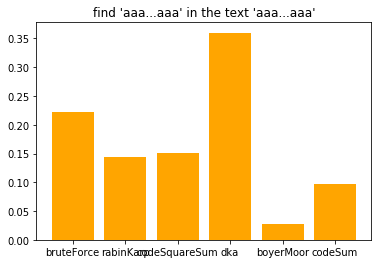

In [53]:
fileName = "histoOneSymbol.txt"
theme = "find \'aaa...aaa\' in the text \'aaa...aaa\'"
data = barData(fileName);
showBar(data, theme)

Мы видим, что алгоритм Бойера-Мура работает быстрее остальных. 
Данный отрыв можно объяснить следующим образом, пусть на каждой итерации этого алгоритма мы и смещаемся на одну позицию, но мы не тратим ресурсы на пересчет сумм, как это делается в хешах, или на полный перебор, как это делается в брутфорсе. Что же касается ДКА, то я полагаю, что большую часть времени мы тратим  на создание самого атомата, а так как строка не маленькая, то это операция слишком дорого нам обходится, чтобы оправдать всю скорость его основного цикла.

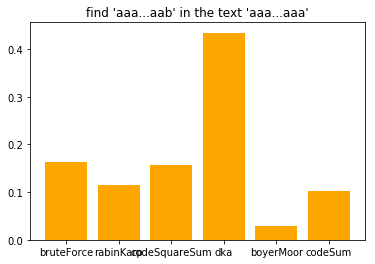

In [54]:
fileName = "histoOneSymbol_otherEnd.txt";
theme = "find \'aaa...aab\' in the text \'aaa...aaa\'"
data = barData(fileName)
showBar(data, theme)

Как и ожидалось, примерные соотношения сил сохранились, Юойер-Мур по прежнему лидирует, да и еще показывает результат, лучше, чем на предыдущем опыте. Я полагаю, что здесь сыграла свою роль полледняя буква, которая сократила обход по тексту в разы, за счет невстречаемости символа "b". 
Остальные алгоритмы остались примерно на том же уровне. Что же касается ДКА, то он даже ухудшил свои показатели, по сравнению с предыдущим опытом. Видимо, стоимость посроения автомата, плюс ещё его хранение сделали все преймущества данного подхода бесполезными.

# И наконец, сравним работы наших алгоритмов на реальных данных

особенности запуска

3. каждый тест запускался для слов с той же самой длиной и  похожей частотой встречаемости в тексте,
потом бралось среднее арифметическое от общего времени. Слов в выборке от 0 до 10, так как были и случаи,
когда слов данной длины с данной частотой просто не было в тексте. Главный текст порядка 13Мб. Текст 
настоящий и взят конкатенацией больших романов.

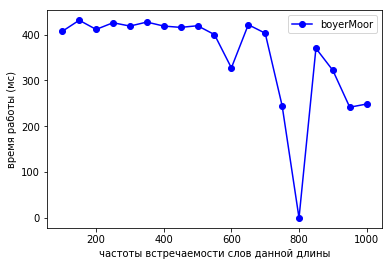

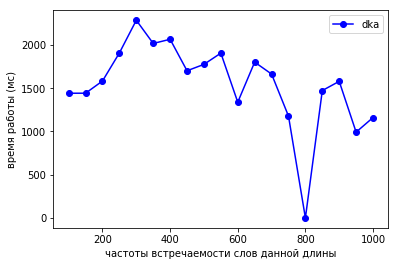

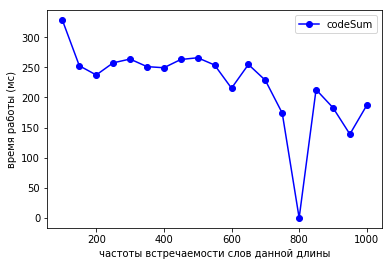

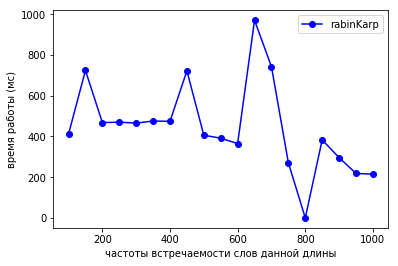

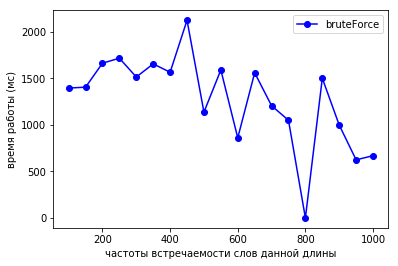

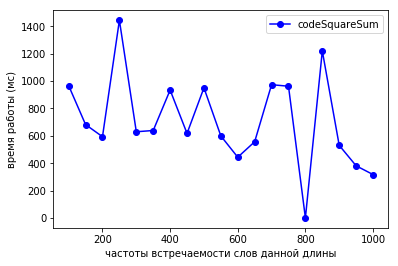

In [10]:
showResult(6); # аргумент - это длина слова

как видно, на реальных данных (очень большой текст, порядка 13мб), наши алгоритмы можно выстроить по величине их работы следующим образом:
    1. codeSum
    2. boyerMoor
    3. rabinKarp
    4. codeSquareSum
    5. bruteForce
    6. dka
(заодно можно увидеть интересную корреляцию встречаемости слова в тексте от его длины)

# Хеш-сумма кодов +1

# Вывод


безусловно, алгоритм Бойера-Мура - есть наиболее оптимальных из данных, но мне хотелось бы прояснить последние результаты, так как их я считаю наиболее значительнымы, так как тексте, на которых он тестировался, брался из настояхих книг: Почему же хеш-суммы обогнали Бойера-Мура? Я считаю, что разгадка к данной тайне кроется во многих факторах, вот некоторые из них:
    1. Многие арифметические операции в современных ЯП оптимизированы очень хорошо, и потому пересчет хеша и проверка на равенство двух чисел есть операция не очень дорогая, особенно когда этот хеш пересчитывается довольно просто. По этмоу мы видим, как простой способ пересчета значения хеша превалирует над более сложными. Так же, в условиях того, что перед нами реалиный текст, а коды в символов из тексте расположены близко друг у другу, то коллизий должно возникать мало, а соответсвенно и вызовов прямой проверки. Это все говорит в пользу хеш-сумм.
    2. Бойер-Мур - есть алгоритм, который очень сильно зависит от структуры слова, а так в естественном языке слова имеют порой родственные связи, или похожие формы, может они начинаются с одно набора символов, а может и заканчиваются, то все эти факторы могут замедлить проверки алгоритмом Бойера-Мура. Что мы и видим.

как и ожидалось, алгоритм Бойера-Мура сумел больше своих соперников в подавляющем большинстве случаев. Тем самым я рекомендую его в качестве кандидотов на звание лучшего алогритма этого вечера.